[ 5.92104075 19.33742923 45.31474662]
True


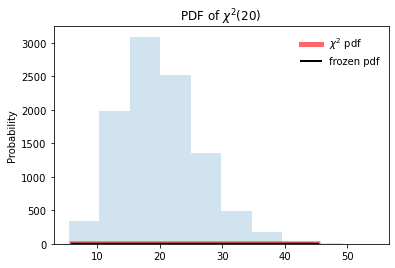

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


def chi2_distribution(df=1):
    """
    卡方分布，在实际的定义中只有一个参数df，即定义中的n
    :param df: 自由度，也就是该分布中独立变量的个数
    :return:
    """

    fig, ax = plt.subplots(1, 1)

    # 直接传入参数, Display the probability density function (pdf)
    x = np.linspace(stats.chi2.ppf(0.001, df),
                    stats.chi2.ppf(0.999, df), 200)
    ax.plot(x, stats.chi2.pdf(x, df), 'r-',
            lw=5, alpha=0.6, label=r'$\chi^2$ pdf')

    # 从冻结的均匀分布取值, Freeze the distribution and display the frozen pdf
    chi2_dis = stats.chi2(df=df)
    ax.plot(x, chi2_dis.pdf(x), 'k-',
            lw=2, label='frozen pdf')

    # 计算ppf分别等于0.001, 0.5, 0.999时的x值
    vals = chi2_dis.ppf([0.001, 0.5, 0.999])
    print(vals)  # [ 2.004  4.     5.996]

    # Check accuracy of cdf and ppf
    print(np.allclose([0.001, 0.5, 0.999], chi2_dis.cdf(vals)))  # Ture

    # Generate random numbers
    r = chi2_dis.rvs(size=10000)
    ax.hist(r, histtype='stepfilled', alpha=0.2)
    plt.ylabel('Probability')
    plt.title(r'PDF of $\chi^2$({})'.format(df))
    ax.legend(loc='best', frameon=False)
    plt.show()

chi2_distribution(df=20)

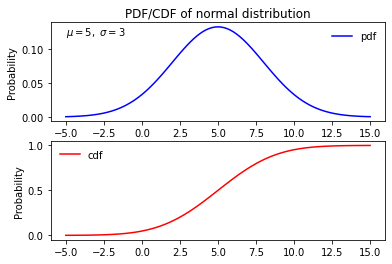

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


norm_dis = stats.norm(5, 3) # 利用相应的分布函数及参数，创建一个冻结的正态分布(frozen distribution)
x = np.linspace(-5, 15, 101)  # 在区间[-5, 15]上均匀的取101个点


# 计算该分布在x中个点的概率密度分布函数值(PDF)
pdf = norm_dis.pdf(x)

# 计算该分布在x中个点的累计分布函数值(CDF)
cdf = norm_dis.cdf(x)

# 下面是利用matplotlib画图
plt.figure(1)
# plot pdf
plt.subplot(211)  # 两行一列，第一个子图
plt.plot(x, pdf, 'b-',  label='pdf')
plt.ylabel('Probability')
plt.title(r'PDF/CDF of normal distribution')
plt.text(-5.0, .12, r'$\mu=5,\ \sigma=3$')  # 3是标准差，不是方差
plt.legend(loc='best', frameon=False)
# plot cdf
plt.subplot(212)
plt.plot(x, cdf, 'r-', label='cdf')
plt.ylabel('Probability')
plt.legend(loc='best', frameon=False)

plt.show()